## 导入数据集并进行数据预处理

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow_hub.keras_layer import keras

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

C:\Users\Administrator\anaconda3\envs\DeepLearning-py310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## 使用顺序API构建回归MLP

In [4]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1))

model.compile(loss="mean_squared_error", optimizer="sgd")

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test= model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 0.7150 - val_loss: 3.3483
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5255 - val_loss: 15.8104
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5027 - val_loss: 2.1006
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4256 - val_loss: 0.3825
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3974 - val_loss: 0.3816
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3902 - val_loss: 0.3798
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3849 - val_loss: 0.3723
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3797 - val_loss: 0.3808
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3775 - val_loss: 0.3719
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3729 - val_loss: 0.376

## 绘制训练曲线

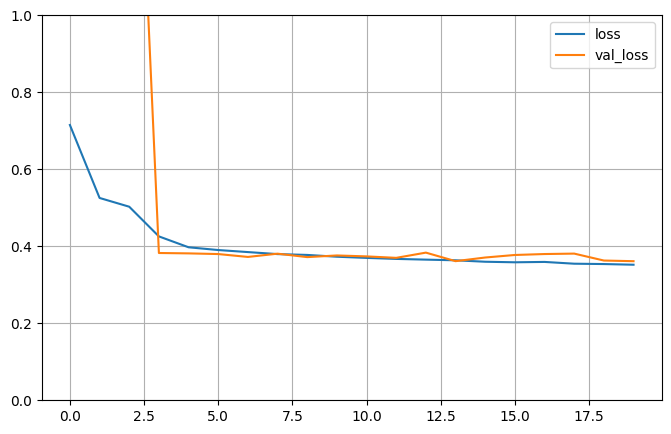

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()